In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load the dataset
df = pd.read_csv('/content/sales_data_sample.csv', encoding='ISO-8859-1')

In [10]:
# Display basic information
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [11]:
# Convert date column to datetime format (if available)
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

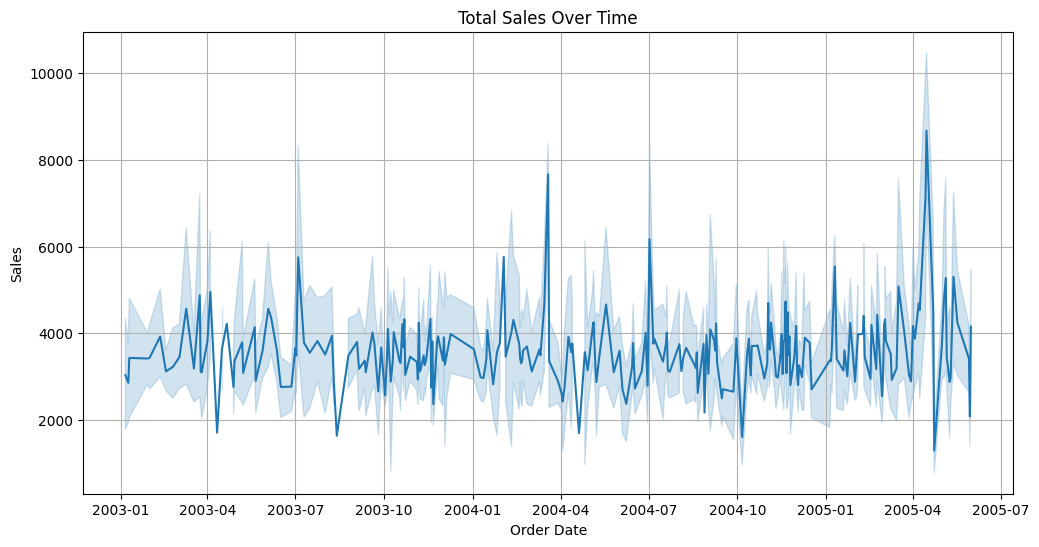

In [12]:
# Total Sales Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='ORDERDATE', y='SALES', data=df)
plt.title('Total Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.grid()
plt.show()

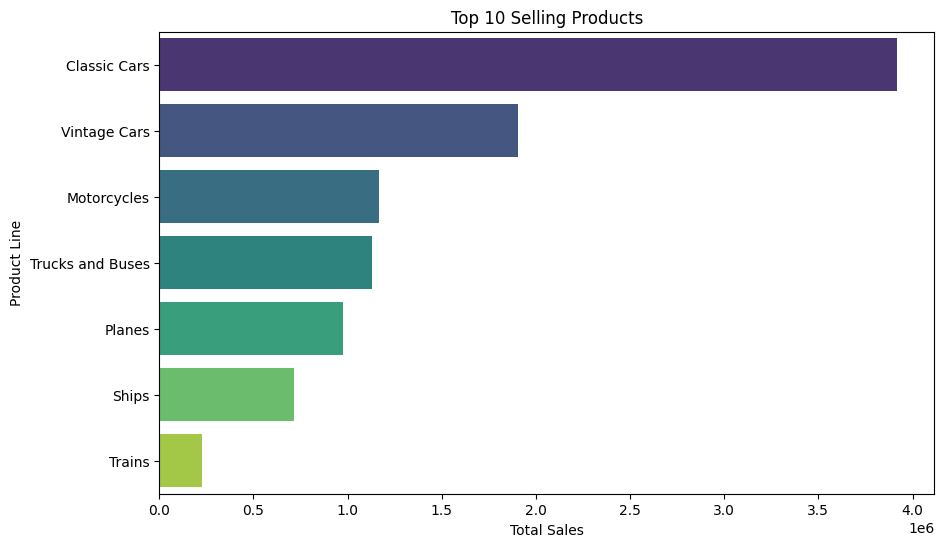

In [17]:
# Top-Selling Products
top_products = df.groupby('PRODUCTLINE')['SALES'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, palette='viridis', legend=False)
plt.title('Top 10 Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product Line')
plt.show()

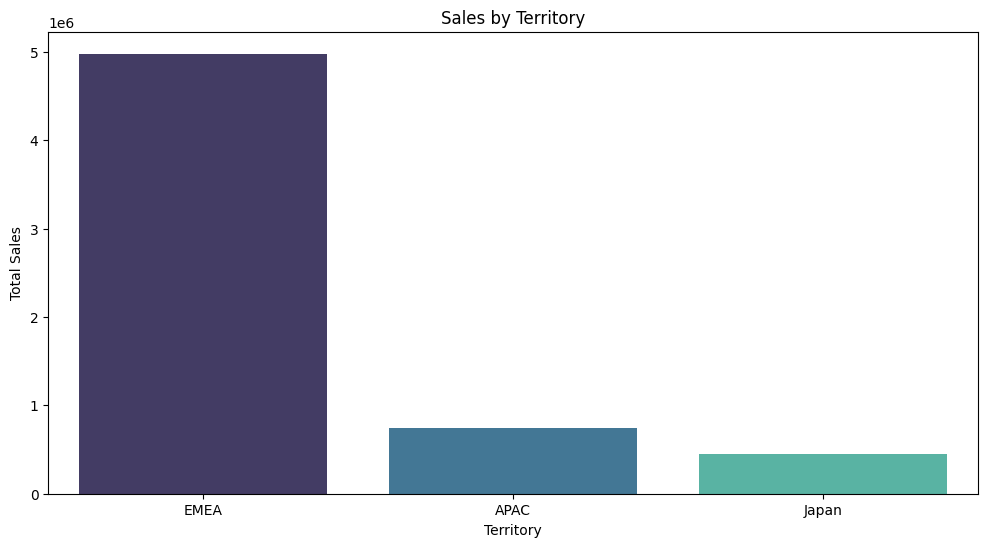

In [18]:
# Sales by Region (or Category)
plt.figure(figsize=(12, 6))
sns.barplot(x='TERRITORY', y='SALES', data=df, estimator=sum, errorbar=None, hue='TERRITORY', palette='mako', legend=False)
plt.title('Sales by Territory')
plt.xlabel('Territory')
plt.ylabel('Total Sales')
plt.show()

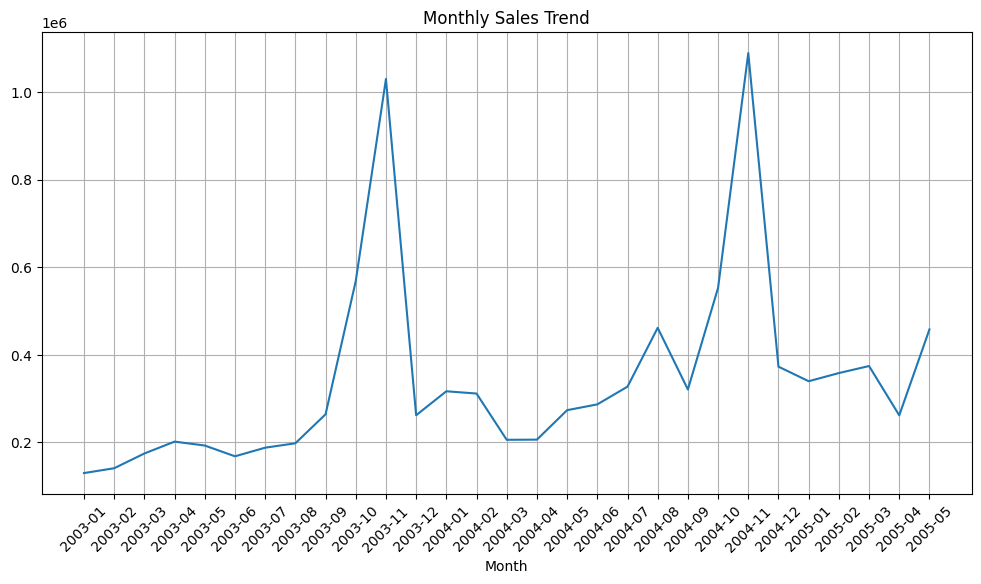

In [15]:
# Monthly Sales Trend
df['Month'] = df['ORDERDATE'].dt.to_period('M')
monthly_sales = df.groupby('Month')['SALES'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values)
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.grid()
plt.show()

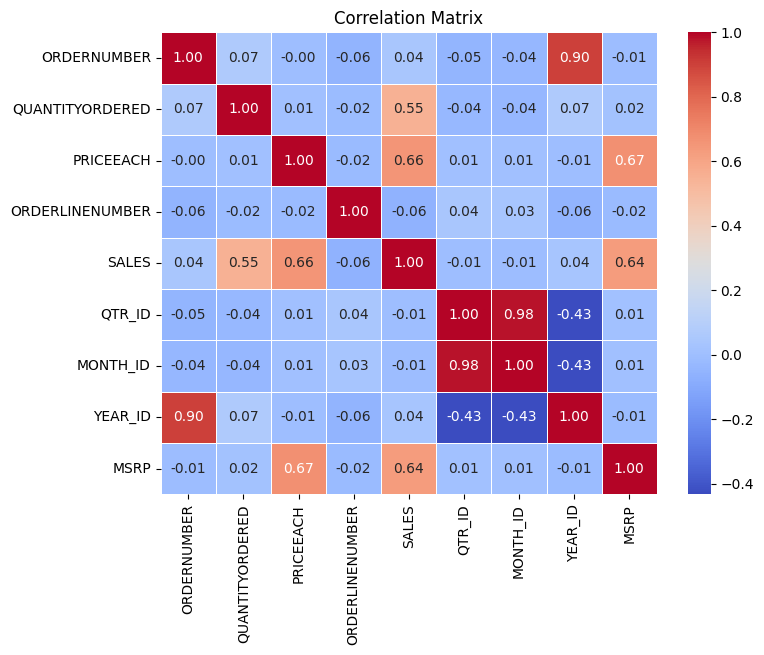

In [16]:
# Correlation Matrix
# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
